
# <center> CSCI 395 - Capstone Project<center>

### <center> José Miguel Ortiz
### <center> Hunter College <center>
### <center> CSCI 395: Introduction to Data Science <center>
### <center> Prof. Adrián Soto Cambres
### <center> Date: 04/21/2025


In [10]:
'''
Name: Jose Miguel Ortiz
Email: jose.ortiz60@lagcc.cuny.edu
Date: 04/21/2025
'''

'\nName: Jose Miguel Ortiz\nEmail: jose.ortiz60@lagcc.cuny.edu\nDate: 04/21/2025\n'

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)


# <center> NYC Subway Entrance Navigator: An Interactive Transit Information Tool <center>

## Overview
This project analyzes the accessibility of New York City's subway system by examining the distribution and characteristics of subway entrances and exits across the five boroughs. The analysis focuses on identifying areas with limited accessibility options, particularly for individuals with mobility challenges who require elevator access.

## Background
New York City's subway system is one of the largest and oldest public transportation networks in the world. While it provides essential transportation for millions of residents and visitors daily, the system's age and design present accessibility challenges. Understanding the current state of subway entrance accessibility is crucial for urban planning, equity considerations, and improving the system for all users.

## Data Source
This analysis uses the MTA Subway Entrances and Exits dataset (2024), which provides detailed information about each subway entrance and exit in the NYC system, including location, entrance type, and accessibility features.


## Data Loading and Exploration


In [12]:
# Load the dataset
file_path = '../Project/MTA_Subway_Entrances_and_Exits__2024_20250418.csv'
subway_entrances = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset shape: {subway_entrances.shape}")
subway_entrances.info()


Dataset shape: (2120, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Division                  2120 non-null   object 
 1   Line                      2120 non-null   object 
 2   Borough                   2120 non-null   object 
 3   Stop Name                 2120 non-null   object 
 4   Complex ID                2120 non-null   int64  
 5   Constituent Station Name  2120 non-null   object 
 6   Station ID                2120 non-null   int64  
 7   GTFS Stop ID              2120 non-null   object 
 8   Daytime Routes            2120 non-null   object 
 9   Entrance Type             2120 non-null   object 
 10  Entry Allowed             2120 non-null   object 
 11  Exit Allowed              2120 non-null   object 
 12  Entrance Latitude         2120 non-null   float64
 13  Entrance Longitude        2120 non-nu

In [13]:
# Display the first few rows of the dataset
subway_entrances.head()


,Division,Line,Borough,Stop Name,Complex ID,Constituent Station Name,Station ID,GTFS Stop ID,Daytime Routes,Entrance Type,Entry Allowed,Exit Allowed,Entrance Latitude,Entrance Longitude,entrance_georeference
0,BMT,4th Av,B,Atlantic Av-Barclays Ctr,617,Atlantic Av-Barclays Ctr,27,R31,2 3 4 5 B D N Q R,Stair,YES,YES,40.683905,-73.978879,POINT (-73.978879 40.683905)
1,BMT,4th Av,B,Atlantic Av-Barclays Ctr,617,Atlantic Av-Barclays Ctr,27,R31,2 3 4 5 B D N Q R,Elevator,YES,YES,40.683805,-73.978487,POINT (-73.978487 40.683805)
2,BMT,4th Av,B,Atlantic Av-Barclays Ctr,617,Atlantic Av-Barclays Ctr,27,R31,2 3 4 5 B D N Q R,Stair,YES,YES,40.683928,-73.978412,POINT (-73.978412 40.683928)
3,BMT,4th Av,B,Union St,28,Union St,28,R32,R,Stair,YES,YES,40.677154,-73.983430,POINT (-73.9834296 40.6771544)
4,BMT,4th Av,B,Union St,28,Union St,28,R32,R,Stair,YES,YES,40.677296,-73.983336,POINT (-73.9833364 40.6772958)


In [19]:
# Check for missing values
missing_values = subway_entrances.isnull().sum()
print("Missing values in each column")
print(missing_values[missing_values > 0])


Missing values in each column
Borough_Name    317
dtype: int64


## Data Cleaning and Preparation


In [15]:
# Clean and prepare the data
# Convert borough codes to full names for better readability
borough_mapping = {
    'M': 'Manhattan',
    'B': 'Brooklyn',
    'Q': 'Queens',
    'X': 'Bronx',
    'S': 'Staten Island'
}

# Apply the mapping
subway_entrances['Borough_Name'] = subway_entrances['Borough'].map(borough_mapping)

# Create a binary column for elevator access
subway_entrances['Has_Elevator'] = subway_entrances['Entrance Type'].str.contains('Elevator', case=False).astype(int)


## Exploratory Data Analysis


## Spatial Analysis


## Analysis of Subway Lines and Accessibility


In [16]:
# Analyze subway lines and their accessibility
routes_df = subway_entrances[['Daytime Routes', 'Has_Elevator', 'Stop Name']].copy()

routes_df['Daytime Routes'] = routes_df['Daytime Routes'].str.split()
routes_exploded = routes_df.explode('Daytime Routes')

route_accessibility = routes_exploded.groupby('Daytime Routes').agg(
    total_entrances=('Stop Name', 'count'),
    elevator_entrances=('Has_Elevator', 'sum')
).reset_index()

route_accessibility['accessibility_percentage'] = (route_accessibility['elevator_entrances'] /
                                                 route_accessibility['total_entrances'] * 100).round(2)

route_accessibility = route_accessibility.sort_values('accessibility_percentage', ascending=False)

route_accessibility.head(10)


,Daytime Routes,total_entrances,elevator_entrances,accessibility_percentage
15,L,131,9,6.87
14,J,146,9,6.16
4,5,248,15,6.05
10,D,236,14,5.93
23,Z,119,7,5.88
18,Q,171,10,5.85
7,A,309,18,5.83
1,2,310,18,5.81
13,G,104,6,5.77
17,N,175,10,5.71


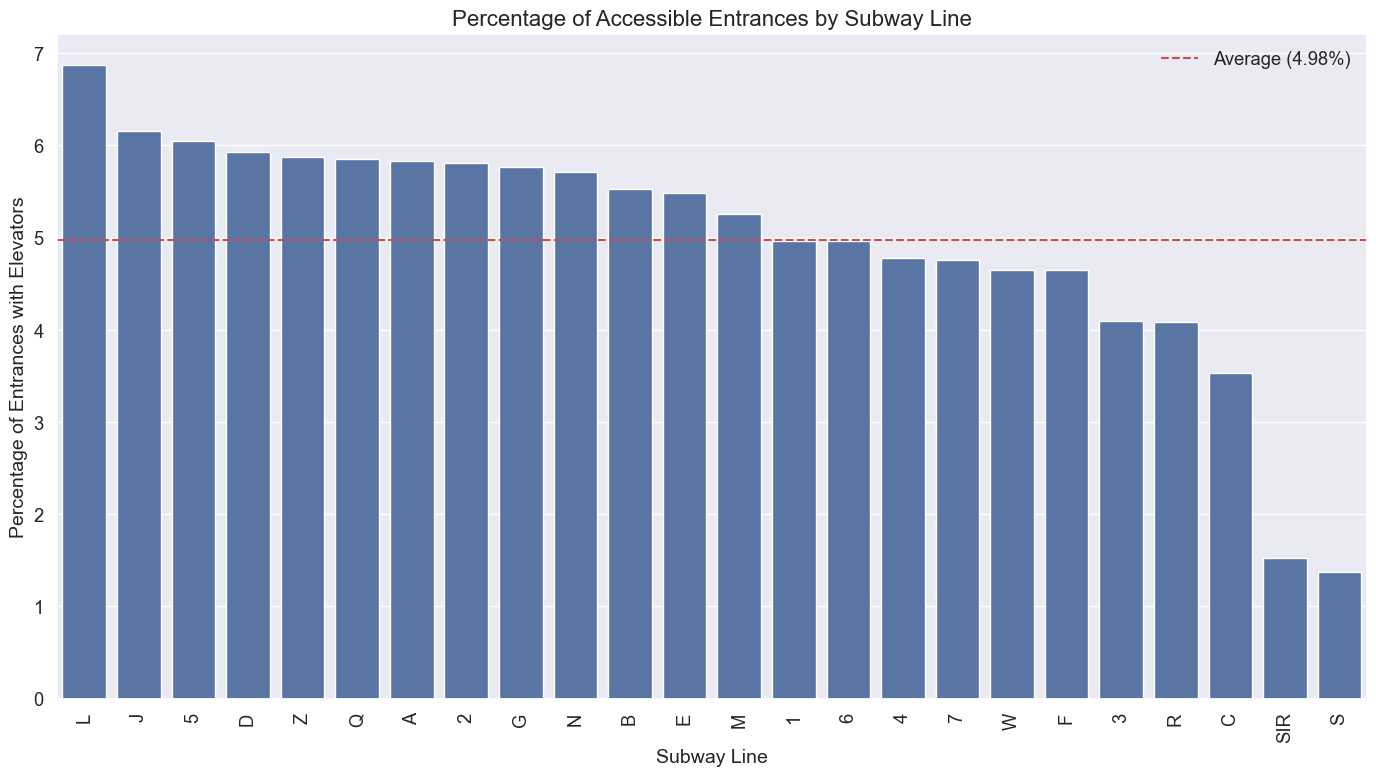

In [17]:
# Visualize the accessibility percentage by subway line
plt.figure(figsize=(14, 8))
sns.barplot(x='Daytime Routes', y='accessibility_percentage', data=route_accessibility)
plt.title('Percentage of Accessible Entrances by Subway Line', fontsize=16)
plt.xlabel('Subway Line', fontsize=14)
plt.ylabel('Percentage of Entrances with Elevators', fontsize=14)
plt.xticks(rotation=90)
plt.axhline(y=route_accessibility['accessibility_percentage'].mean(), color='r', linestyle='--',
            label=f'Average ({route_accessibility["accessibility_percentage"].mean():.2f}%)')
plt.legend()
plt.tight_layout()
plt.show()


## Identifying Accessibility Gaps


In [18]:
# Group by station to identify stations with no elevator access
station_accessibility = subway_entrances.groupby('Stop Name').agg(
    total_entrances=('Entrance Type', 'count'),
    elevator_entrances=('Has_Elevator', 'sum'),
    borough=('Borough_Name', 'first'),
    routes=('Daytime Routes', 'first')
).reset_index()

# Identify stations with no elevator access
inaccessible_stations = station_accessibility[station_accessibility['elevator_entrances'] == 0]

#   Sort by total entrances to find the busiest inaccessible stations
inaccessible_stations = inaccessible_stations.sort_values('total_entrances', ascending=False)

#   Displays the top 10 busiest stations without elevator access
print(f"Total stations without elevator access: {len(inaccessible_stations)}")
inaccessible_stations.head(10)


Total stations without elevator access: 291


,Stop Name,total_entrances,elevator_entrances,borough,routes
225,Fulton St,32,0,Manhattan,2 3 4 5 A C J Z
230,Grand Central-42 St,22,0,Manhattan,4 5 6 7 S
269,Lexington Av/51-53 Sts,21,0,Manhattan,6 E M
77,50 St,19,0,Manhattan,C E
360,Wall St,18,0,Manhattan,2 3
52,28 St,18,0,Manhattan,1
256,Jay St-MetroTech,17,0,Brooklyn,A C F R
324,Rector St,15,0,Manhattan,R W
195,DeKalb Av,14,0,Brooklyn,B Q R
16,145 St,13,0,Manhattan,A C B D
